# Surface of genus two

An example of how, in the presence of more than one prominent circular feature in the data, the toroidal coordinates algorithm returns circle-valued maps that are geometrically less correlated and easier to interpret than the ones returned by running the circular coordinates algorithm on each individual class.

In [1]:
from dreimac import CircularCoords, ToroidalCoords, GeometryExamples, PlotUtils, CircleMapUtils
from persim import plot_diagrams
import matplotlib.pyplot as plt

We start by displaying the data, which consists of a pointcloud in 3D.

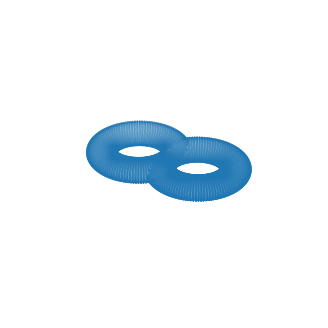

In [2]:
X = GeometryExamples.genus_two_surface()

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], s=0.1)
PlotUtils.set_axes_equal(ax)
plt.axis("off")
plt.show()

Compute and display the Rips persistent homology.

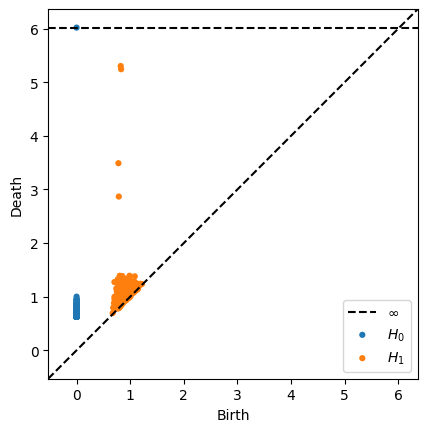

In [3]:
tc = ToroidalCoords(X, n_landmarks=1000)
plot_diagrams(tc.dgms_)

We now construct two sets of four circle-valued maps. For the first set, we use the toroidal coordinates with input the four most prominent persistent cohomology classes; for the second, we run the circular coordinates algorithm on each of the four individual classes.

In [4]:
cohomology_classes = [0, 1, 2, 3]
toroidal_coords = tc.get_coordinates(cocycle_idxs=cohomology_classes)

In [5]:
cc = CircularCoords(X, n_landmarks=1000)
circular_coords1 = cc.get_coordinates(cocycle_idx=cohomology_classes[0])
circular_coords2 = cc.get_coordinates(cocycle_idx=cohomology_classes[1])
circular_coords3 = cc.get_coordinates(cocycle_idx=cohomology_classes[2])
circular_coords4 = cc.get_coordinates(cocycle_idx=cohomology_classes[3])
circular_coords = [ circular_coords1, circular_coords2, circular_coords3, circular_coords4 ]

We display the circle-valued representations obtained with toroidal coordinates.

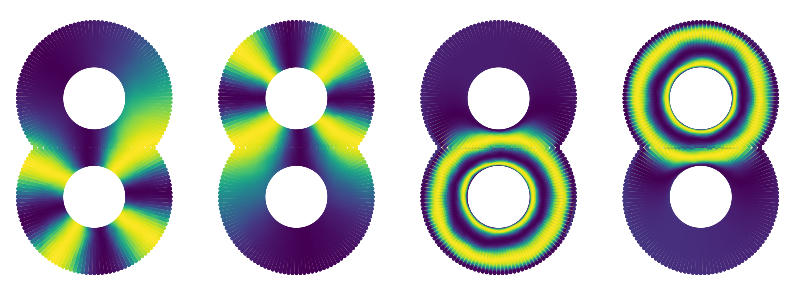

In [6]:
t_col1 = CircleMapUtils.levelset_coloring(CircleMapUtils.offset(toroidal_coords[0], 0.25))
t_col2 = CircleMapUtils.levelset_coloring(CircleMapUtils.offset(toroidal_coords[1], 0.55))
t_col3 = CircleMapUtils.levelset_coloring(CircleMapUtils.offset(toroidal_coords[2], 0.20))
t_col4 = CircleMapUtils.levelset_coloring(CircleMapUtils.offset(toroidal_coords[3], 0.32))

PlotUtils.plot_2d_scatter_with_different_colorings(X[:,[1,0]], [t_col1,t_col2,t_col3,t_col4])

We display the circle-valued representations obtained with circular coordinates.

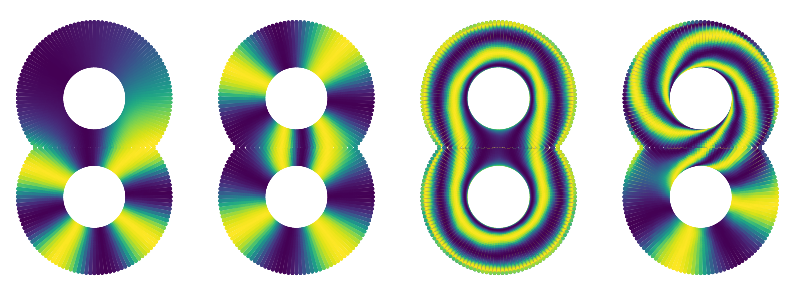

In [7]:
c_col1 = CircleMapUtils.levelset_coloring(circular_coords[0])
c_col2 = CircleMapUtils.levelset_coloring(circular_coords[1])
c_col3 = CircleMapUtils.levelset_coloring(circular_coords[2])
c_col4 = CircleMapUtils.levelset_coloring(circular_coords[3])

PlotUtils.plot_2d_scatter_with_different_colorings(X[:,[1,0]], [c_col1,c_col2,c_col3,c_col4])